<a href="https://colab.research.google.com/github/Kuriajm/Ds_Core_Week2_IP_10-2021/blob/main/Ds_Core_Week2_Ip_Mutura_Kuria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Define the question, the metric for success, the context, experimental design taken and the appropriateness of the available data to answer the given question.**

### **Define the question**

How we can predict which individuals are most likely to have or use a bank account in Kenya, Uganda, Rwanda and Tanzania?

### **Metric of Success**

A model that is able to predict individuals with the ability to have a bank account

### **The Context**

Financial Inclusion remains one of the main obstacles to economic and human development in Africa. For example, across Kenya, Rwanda, Tanzania, and Uganda only 9.1 million adults (or 13.9% of the adult population) have access to or use a commercial bank account.

Traditionally, access to bank accounts has been regarded as an indicator of financial inclusion. Despite the proliferation of mobile money in Africa and the growth of innovative fintech solutions, banks still play a pivotal role in facilitating access to financial services. Access to bank accounts enables households to save and facilitate payments while also helping businesses build up their credit-worthiness and improve their access to other financial services. Therefore, access to bank accounts is an essential contributor to long-term economic growth.

The research problem is to figure out how we can predict which individuals are most likely to have or use a bank account. Your solution will help provide an indication of the state of financial inclusion in Kenya, Rwanda, Tanzania, and Uganda, while providing insights into some of the key demographic factors that might drive individuals’ financial outcomes.

### **The Experiment Design Taken**

1. Define the question, the metric for success, the context, experimental design taken and the appropriateness of the available data to answer the given question.

2. Find and deal with outliers, anomalies, and missing data within the dataset.
Perform univariate, bivariate and multivariate analysis recording your observations.

3. Implement the solution by performing the respective analysis i.e. factor analysis, principal component analysis, and discriminant analysis.

4. Challenge your solution by providing insights on how you can make improvements.

### **The appropriateness of the available data to answer the given question.**

1. Importing the Libraries
2. Loading the data
3. Checking the data

**Importing the Libraries**

In [2]:

#We import all the libraries needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


**Reading the Data**

In [3]:
# Loading the Data from the source i.e. csv
# Dataset url = http://bit.ly/MedicalCitiesIncomeDataset
#

fin_df = pd.read_csv('http://bit.ly/FinancialDataset')

**Checking the Data**

In [4]:
# Determining the no. of records in our dataset
#
fin_df.shape

(23524, 13)

In [5]:
# Previewing the top of our dataset
#
fin_df.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [6]:
# Previewing the bottom of our dataset
# 
fin_df.tail()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [7]:
# Checking whether each column has an appropriate datatype
#
fin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23510 non-null  object 
 1   year                    23524 non-null  int64  
 2   uniqueid                23524 non-null  object 
 3   Has a Bank account      23488 non-null  object 
 4   Type of Location        23509 non-null  object 
 5   Cell Phone Access       23513 non-null  object 
 6   household_size          23496 non-null  float64
 7   Respondent Age          23490 non-null  float64
 8   gender_of_respondent    23490 non-null  object 
 9   The relathip with head  23520 non-null  object 
 10  marital_status          23492 non-null  object 
 11  Level of Educuation     23495 non-null  object 
 12  Type of Job             23494 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


**Data approprietness report**

1. The data has 13 columns and 23524 rows.
2. The 13 columns have good data to enable us perform the analysis even though we will have to convert some of the data for PCA.

Our data is appropriate to answer our question.

# 2. Cleaning the data 

Find and deal with outliers, anomalies, and missing data within the dataset.

In [8]:
# Standardizing column names
# Removing white spaces, lowering the case, replacing spaces with _, and removing brackets 
fin_df.columns = fin_df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

# Renaming some column names
fin_df.rename({'has_a_bank_account': 'bank_account', 'type_of_location': 'location', 'cell_phone_access' : 'phone', 'respondent_age':'age', 'gender_of_respondent':'gender', 'the_relathip_with_head' : 'relationship_with_head', 'level_of_educuation' : 'education_level'}, axis=1, inplace=True)

# Dispalying the column names
fin_df.columns

Index(['country', 'year', 'uniqueid', 'bank_account', 'location', 'phone',
       'household_size', 'age', 'gender', 'relationship_with_head',
       'marital_status', 'education_level', 'type_of_job'],
      dtype='object')

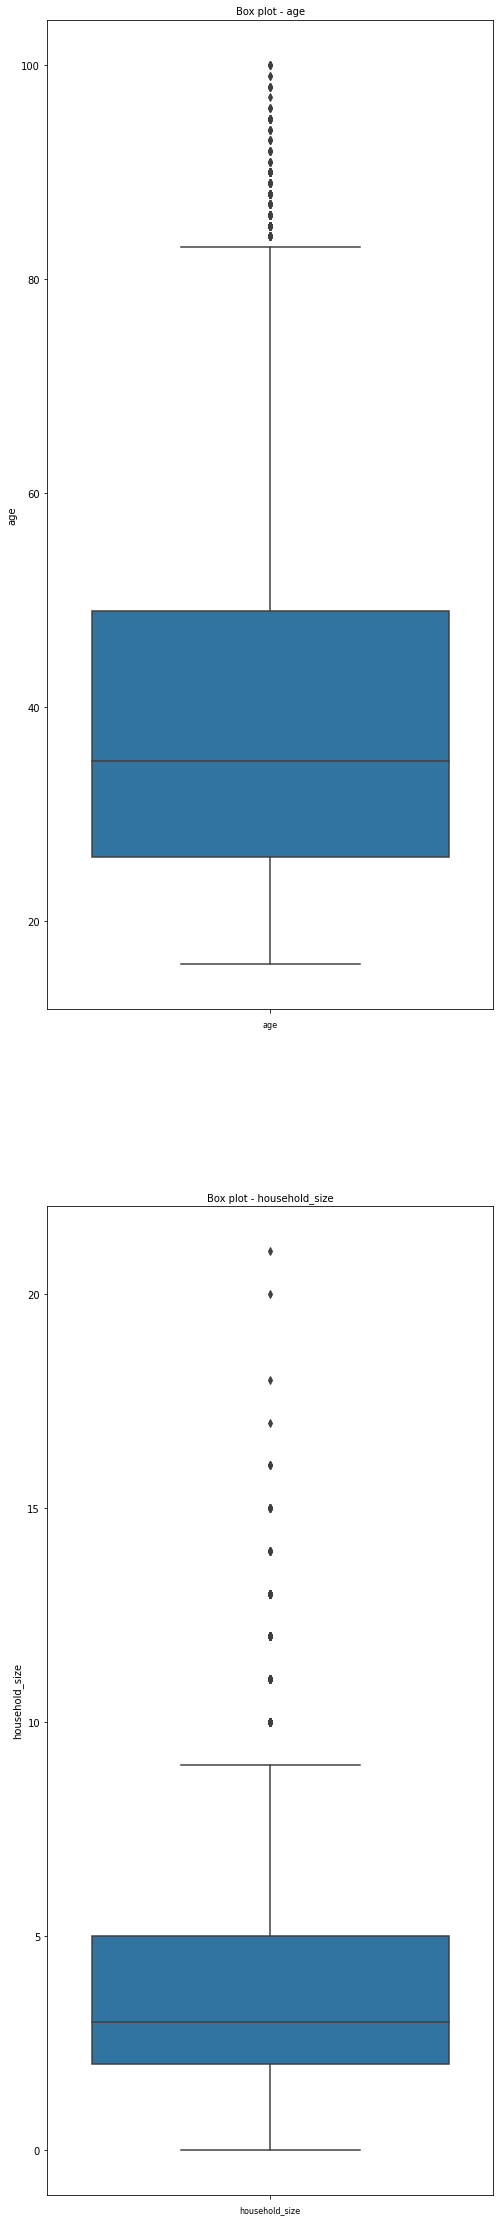

In [9]:
# Checking for Outliers
#
col_names = [ 'age', 'household_size']

fig, ax = plt.subplots(len(col_names), figsize=(8,40))

for i, col_val in enumerate(col_names):

    sns.boxplot(y=fin_df[col_val], ax=ax[i])
    ax[i].set_title('Box plot - {}'.format(col_val), fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)

plt.show()

In [10]:
#Dealing with the outliers
# Removing outliers
Q1 = fin_df.quantile(0.25)
Q3 = fin_df.quantile(0.75)
IQR = Q3 - Q1
fin_df = fin_df[~((fin_df < (Q1 - 1.5 * IQR)) | (fin_df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [11]:
# Checking for Anomalies
#
fin_df.nunique()

country                      4
year                         3
uniqueid                  8692
bank_account                 2
location                     2
phone                        2
household_size              10
age                         68
gender                       2
relationship_with_head       6
marital_status               5
education_level              7
type_of_job                 10
dtype: int64

In [12]:
#Check anomalies in specific columns that has many entries
#Household Size
fin_df['household_size'].unique()



array([ 3.,  5.,  8.,  7.,  1.,  6.,  4.,  2.,  9., nan,  0.])

We got null values and 0 which are anomalies. We will deal with null values below, lets see how many 0 values we have

In [13]:
#Counting the 0 values
fin_df[(fin_df['household_size']==0)].shape

(27, 13)

We have 27 records with 0 values

In [14]:
#Null values
fin_df['household_size'].isnull().sum()

27

27 null values

Lets do away with the null values and 0 values

In [15]:
## Dropping the entries with '0' 'household_size' 
fin_df.drop(fin_df.index[fin_df['household_size'] == 0], inplace = True)

In [16]:
# Identifying the Missing Data
#
fin_df.isnull().sum()

country                   14
year                       0
uniqueid                   0
bank_account              36
location                  15
phone                     11
household_size            27
age                       33
gender                    33
relationship_with_head     4
marital_status            31
education_level           29
type_of_job               30
dtype: int64

In [17]:
# Dealing with the Missing Data
#
clean_df = fin_df.dropna()
clean_df.isnull().sum()

country                   0
year                      0
uniqueid                  0
bank_account              0
location                  0
phone                     0
household_size            0
age                       0
gender                    0
relationship_with_head    0
marital_status            0
education_level           0
type_of_job               0
dtype: int64

In [18]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22698 entries, 0 to 23522
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 22698 non-null  object 
 1   year                    22698 non-null  int64  
 2   uniqueid                22698 non-null  object 
 3   bank_account            22698 non-null  object 
 4   location                22698 non-null  object 
 5   phone                   22698 non-null  object 
 6   household_size          22698 non-null  float64
 7   age                     22698 non-null  float64
 8   gender                  22698 non-null  object 
 9   relationship_with_head  22698 non-null  object 
 10  marital_status          22698 non-null  object 
 11  education_level         22698 non-null  object 
 12  type_of_job             22698 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.4+ MB


Our Data looks clean now!

# **Perform univariate, bivariate and multivariate analysis recording your observations.**

**Univariate Analysis**

Since most of our data is DESCRIPTIVE, we shall use Bar chats and pie chats for Univariate analysis

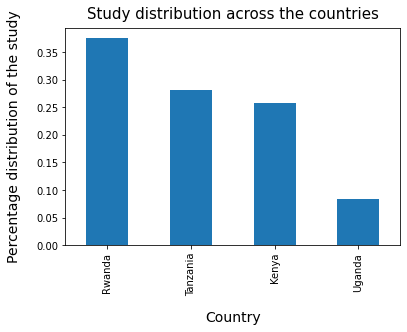

In [19]:
#A bar graph that shows the study's distribution across the countries

(clean_df['country'].value_counts(normalize=True)).plot.bar()

# labelling the bar chart 
plt.title('Study distribution across the countries', fontsize=15, y=1.015)
# labelling the x axis 
plt.xlabel('Country', fontsize=14, labelpad=15)
# labelling the y axis
plt.ylabel('Percentage distribution of the study', fontsize=14, labelpad=15)
#display bar chart
plt.show()

In [20]:
clean_df['country'].value_counts(normalize=True)

Rwanda      0.375011
Tanzania    0.281831
Kenya       0.258525
Uganda      0.084633
Name: country, dtype: float64

From this: 
1. 37.5% were from Rwanda
2. 28.2% were from Tanzania
3. 25.9% were from Kenya
4. 8.4% were from Uganda

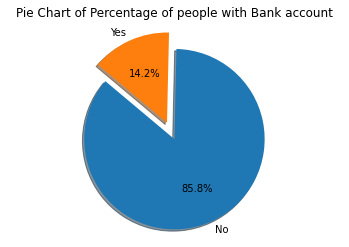

In [21]:
#Pie chart showing percentages of those with Bank accounts across the study.

#(clean_df['bank_account'].value_counts(normalize=True)).plot.pie()
plt.pie(clean_df['bank_account'].value_counts(normalize=True), labels =clean_df['bank_account'].value_counts().index, autopct = '%1.1f%%', shadow = True,explode=(0.2,0), startangle = 140)
plt.axis('equal')
plt.title('Pie Chart of Percentage of people with Bank account')
plt.show()

Only 14.2 percent of people have bank account

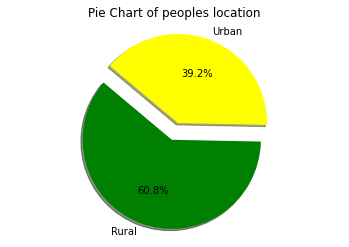

In [22]:
#Pie chart showing locations across the study.

plt.pie(clean_df['location'].value_counts(normalize=True), labels =clean_df['location'].value_counts().index,colors = ['Green', 'Yellow'], autopct = '%1.1f%%', shadow = True,explode=(0.2,0), startangle = 140)
plt.axis('equal')
plt.title('Pie Chart of peoples location')
plt.show()

60.8% of the people are in Rural areas

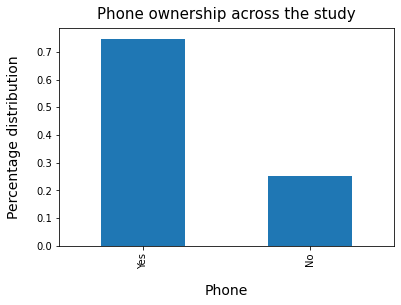

In [23]:
#A bar graph that shows percentage of people with phones

(clean_df['phone'].value_counts(normalize=True)).plot.bar()

# labelling the bar chart 
plt.title('Phone ownership across the study', fontsize=15, y=1.015)
# labelling the x axis 
plt.xlabel('Phone', fontsize=14, labelpad=15)
# labelling the y axis
plt.ylabel('Percentage distribution', fontsize=14, labelpad=15)
#display bar chart
plt.show()

In [24]:
clean_df['phone'].value_counts(normalize=True)

Yes    0.747775
No     0.252225
Name: phone, dtype: float64

74.8% have phones

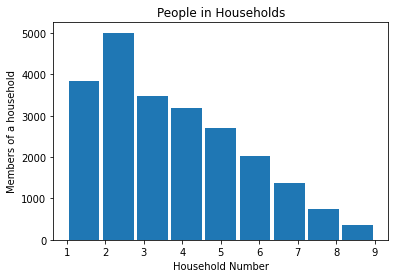

In [25]:
#Household sizes
plt.hist(clean_df['household_size'], bins=9, histtype='bar', rwidth=0.9)
plt.xlabel('Household Number')
plt.ylabel('Members of a household')
plt.title('People in Households')
plt.show()

***Measures of central tendancy for Household size***

In [26]:
#Mean number of people per household
clean_df['household_size'].mean()



3.5841043263723678

In [27]:
#Mode number of people per houshold
clean_df['household_size'].mode()

0    2.0
dtype: float64

In [28]:
#Median number of people per houshold
clean_df['household_size'].median()

3.0

***Measures of dispersion for Household size***

In [29]:
#range of Household size

clean_df['household_size'].max()-clean_df['household_size'].min()

8.0

In [30]:
#Variance of the household size
clean_df['household_size'].var()

4.318541870773892

In [31]:
#Standard deviation of the household size
clean_df['household_size'].std()

2.0781101681031955

In [32]:
#Quatiles of the household size
clean_df['household_size'].quantile([0.25,0.5,0.75])

0.25    2.0
0.50    3.0
0.75    5.0
Name: household_size, dtype: float64

In [33]:
#Skewness daviation of the household size

clean_df['household_size'].skew()


0.6086612029515418

In [34]:
#Kurtosis of the household size
clean_df['household_size'].kurt()

-0.5063903490094659

In [35]:
#Summary
clean_df['household_size'].describe()

count    22698.000000
mean         3.584104
std          2.078110
min          1.000000
25%          2.000000
50%          3.000000
75%          5.000000
max          9.000000
Name: household_size, dtype: float64

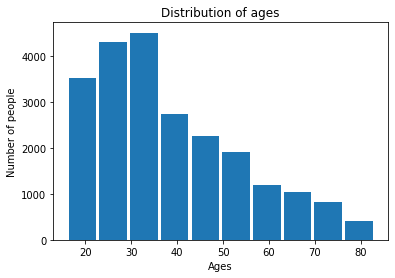

In [36]:
#Age
plt.hist(clean_df['age'], bins=10, histtype='bar', rwidth=0.9)
plt.xlabel('Ages')
plt.ylabel('Number of people')
plt.title('Distribution of ages')
plt.show()

***Measures of central tendancy for Ages***

In [37]:
#Mean 
clean_df['age'].mean()



38.340074015331744

In [38]:
#Mode 
clean_df['age'].mode()

0    30.0
dtype: float64

In [39]:
#Median 
clean_df['age'].median()

35.0

***Measures of dispersion for Ages***

In [40]:
#range 

clean_df['age'].max()-clean_df['age'].min()

67.0

In [41]:
#Variance 
clean_df['age'].var()

249.48750798235838

In [42]:
#Standard deviation
clean_df['age'].std()

15.795173566072593

In [43]:
#Quatiles 
clean_df['age'].quantile([0.25,0.5,0.75])

0.25    26.0
0.50    35.0
0.75    48.0
Name: age, dtype: float64

In [44]:
#Skewness 
clean_df['age'].skew()


0.740547706632171

In [45]:
#Kurtosis 
clean_df['age'].kurt()

-0.23526904531397586

In [46]:
#Summary
clean_df['age'].describe()

count    22698.000000
mean        38.340074
std         15.795174
min         16.000000
25%         26.000000
50%         35.000000
75%         48.000000
max         83.000000
Name: age, dtype: float64

### **Bivariate analysis**

**We start with Categorical vs categorical**


In [47]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22698 entries, 0 to 23522
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 22698 non-null  object 
 1   year                    22698 non-null  int64  
 2   uniqueid                22698 non-null  object 
 3   bank_account            22698 non-null  object 
 4   location                22698 non-null  object 
 5   phone                   22698 non-null  object 
 6   household_size          22698 non-null  float64
 7   age                     22698 non-null  float64
 8   gender                  22698 non-null  object 
 9   relationship_with_head  22698 non-null  object 
 10  marital_status          22698 non-null  object 
 11  education_level         22698 non-null  object 
 12  type_of_job             22698 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.4+ MB


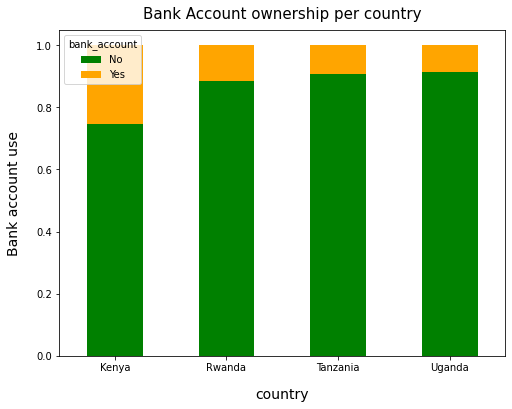

In [48]:
#Is there a relationship Countries and bank accounts
country=fin_df.groupby('country')['bank_account'].value_counts(normalize=True).unstack()

# Specifying the colors of the stacked columns
colors= ['Green', 'Orange']
# Plotting the chart
country.plot(kind='bar', figsize=(8, 6), color=colors, stacked=True)
# Giving the chart a title
plt.title('Bank Account ownership per country', fontsize=15, y=1.015)
# Labelling the x axis
plt.xlabel('country', fontsize=14, labelpad=15)
# rotating the labels on the x axis
plt.xticks(rotation = 360)
# Labellinbg the y axis
plt.ylabel('Bank account use', fontsize=14, labelpad=15)
# Displaying the chart
plt.show()

Text(0.5, 1.0, 'Access to bank by age and gender')

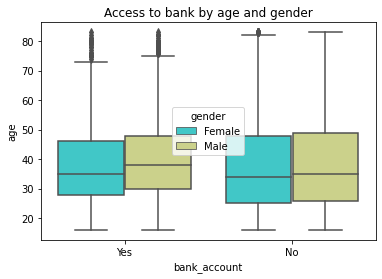

In [49]:
#Whats the proportion of bank accout use with ages?

sns.boxplot(x='bank_account',y='age',data=clean_df, hue = 'gender', palette='rainbow')
plt.title("Access to bank by age and gender")

We can see here those with bank account are those between the ages of 30 and 49 for both genders. 

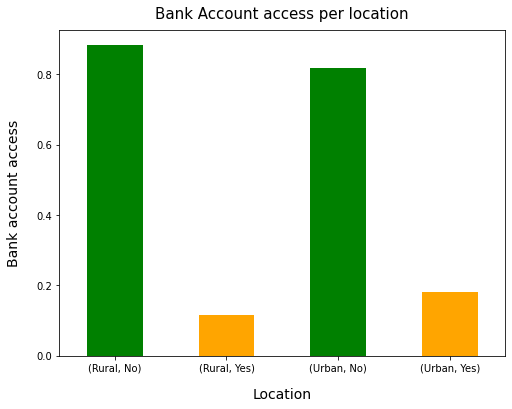

In [50]:
loc=fin_df.groupby('location')['bank_account'].value_counts(normalize=True)


# Specifying the colors of the stacked columns
colors= ['Green', 'Orange']
# Plotting the chart
loc.plot(kind='bar', figsize=(8, 6), color=colors, stacked=True)
# Giving the chart a title
plt.title('Bank Account access per location', fontsize=15, y=1.015)
# Labelling the x axis
plt.xlabel('Location', fontsize=14, labelpad=15)
# rotating the labels on the x axis
plt.xticks(rotation = 360)
# Labellinbg the y axis
plt.ylabel('Bank account access', fontsize=14, labelpad=15)
# Displaying the chart
plt.show()

Urban areas have the highest bank access

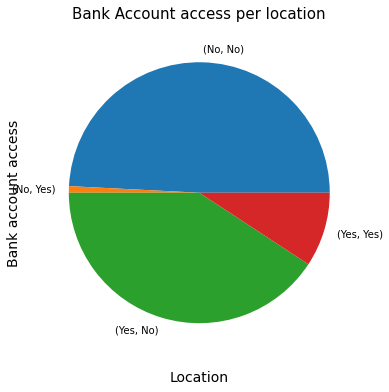

In [51]:
phone=fin_df.groupby('phone')['bank_account'].value_counts(normalize=True)


# Specifying the colors of the stacked columns
colors= ['Green', 'Orange']
# Plotting the chart
phone.plot(kind='pie', figsize=(8, 6),  stacked=True)
# Giving the chart a title
plt.title('Bank Account access per location', fontsize=15, y=1.015)
# Labelling the x axis
plt.xlabel('Location', fontsize=14, labelpad=15)
# rotating the labels on the x axis
plt.xticks(rotation = 360)
# Labellinbg the y axis
plt.ylabel('Bank account access', fontsize=14, labelpad=15)
# Displaying the chart
plt.show()

# **Implementing Solution**

To implement solution we will go through Multivariate analysis. Specifically we will do a principle component analysis.

**Why PCA**

Because we can reduce all this features to be analysed as one feature therefore saving us time .

In [52]:
#Lets first check our dataset

clean_df.tail()

,country,year,uniqueid,bank_account,location,phone,household_size,age,gender,relationship_with_head,marital_status,education_level,type_of_job
23512,Uganda,2018,uniqueid_2102,No,Rural,No,2.0,57.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed


For us to work with this dataset we must convert the objects to labels that machine can read. This is encoding the data.

In [53]:
#Here we are encoding the data that is replacing values with numerical codes that will be undaerstood by the machine
#Importing the encoder
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

#Encoding each column individually

clean_df['country']=encoder.fit_transform(clean_df['country'].astype(str))

clean_df['location']=encoder.fit_transform(clean_df['location'].astype(str))

clean_df['phone']=encoder.fit_transform(clean_df['phone'].astype(str))

clean_df['gender']=encoder.fit_transform(clean_df['gender'].astype(str))

clean_df['relationship_with_head']=encoder.fit_transform(clean_df['relationship_with_head'].astype(str))

clean_df['marital_status']=encoder.fit_transform(clean_df['marital_status'].astype(str))

clean_df['education_level']=encoder.fit_transform(clean_df['education_level'].astype(str))

clean_df['type_of_job']=encoder.fit_transform(clean_df['type_of_job'].astype(str))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

In [54]:
#Lets have a look at our new dataset
clean_df.head()

,country,year,uniqueid,bank_account,location,phone,household_size,age,gender,relationship_with_head,marital_status,education_level,type_of_job
0,0,2018,uniqueid_1,Yes,0,1,3.0,24.0,0,5,2,4,9
1,0,2018,uniqueid_2,No,0,0,5.0,70.0,0,1,4,1,4
2,0,2018,uniqueid_3,Yes,1,1,5.0,26.0,1,3,3,6,9
3,0,2018,uniqueid_4,No,0,1,5.0,34.0,0,1,2,3,3
4,0,2018,uniqueid_5,No,1,0,8.0,26.0,1,0,3,3,5


In [55]:
#Since we are not going to use year and unique id lets drop them

clean_df.drop(['year', 'uniqueid'],axis=1, inplace=True)
clean_df.tail()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,country,bank_account,location,phone,household_size,age,gender,relationship_with_head,marital_status,education_level,type_of_job
23512,3,No,0,0,2.0,57.0,0,1,0,1,7
23519,3,No,0,1,4.0,48.0,0,1,0,1,7
23520,3,No,0,1,2.0,27.0,0,1,3,4,7
23521,3,No,0,1,5.0,27.0,0,4,4,3,7
23522,3,No,1,1,7.0,30.0,0,4,0,4,9


In [56]:
#  Preprocessing
# The first preprocessing step is to divide the dataset into a feature set and corresponding labels. 
# The following script performs this task. The script below stores the feature sets into the X variable 
# and the series of corresponding labels in to the y variable.
# 
X = clean_df.drop('bank_account', 1)
y = clean_df['bank_account']

In [57]:
# Splitting the dataset into the Training set and Test set
# The next preprocessing step is to divide data into training and test sets. 
# We execute the following script to do so:
#
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [58]:
#Normalization
# As mentioned earlier, PCA performs best with a normalized feature set. 
# We will perform standard scalar normalization to normalize our feature set. 
# To do this, we execute the following code:
# 
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [59]:
#Applying PCA
# It is only a matter of three lines of code to perform PCA using Python's Scikit-Learn library. 
# The PCA class is used for this purpose. PCA depends only upon the feature set and not the label data. 
# Therefore, PCA can be considered as an unsupervised machine learning technique.
# Performing PCA using Scikit-Learn is a two-step process:
# Initialize the PCA class by passing the number of components to the constructor.
# Call the fit and then transform methods by passing the feature set to these methods. 
# The transform method returns the specified number of principal components.
# Let's take a look at the following code. In the code above, we create a PCA object named pca. 
# We did not specify the number of components in the constructor. 
# Hence, all four of the features in the feature set will be returned for both the training and test sets.
# 
from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [60]:
#Explained Variance Ratio
# The PCA class contains explained_variance_ratio_ which returns the variance caused by each of the principal components. 
# We execute the following line of code to find the "explained variance ratio".
# 
explained_variance = pca.explained_variance_ratio_

# The explained_variance variable is now a float type array which contains variance ratios for each principal component. 
# The values for the explained_variance variable looks like what is shown in the output. 
# It can be seen that first principal component is responsible for 72.22% variance. 
# Similarly, the second principal component causes 23.9% variance in the dataset. 
# Collectively we can say that (72.22 + 23.9) 96.21% percent of the classification information contained 
# in the feature set is captured by the first two principal components.
explained_variance

array([0.19296087, 0.16025284, 0.15491074, 0.10195225, 0.08257215,
       0.08092586, 0.07226875, 0.05712662, 0.05386717, 0.04316276])

In [61]:
# Using 1 Principal Component
# Let's first try to use 1 principal component to train our algorithm. To do so, execute the following code:
# 
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [62]:
# Training and Making Predictions
# In this case we'll use random forest classification for making the predictions.
# 
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [63]:
# Performance Evaluation
# 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))

# Noting that from the output that with only one feature, 
# the resulting accuracy is in 85.54%

[[3878    0]
 [ 662    0]]
Accuracy 0.8541850220264318


In [64]:
# Evaluating classification performance of the random forest algorithm with 2 of the principal components

# Divide data into train and test sets by executing the following script
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Perform standard scalar normalization to normalize our feature set by executing the following code
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Use 2 principal components to train our algorithm by executing the following code
pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [65]:
# Use random forest classification for training and making the predictions when using two of the principal components
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [66]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))

[[3878    0]
 [ 662    0]]
Accuracy 0.8541850220264318


We can see the prediction is the same. Therefore it is safe to say that its possible to predict whether all this factors can influence an individual to own a bank account.

# **Linear Discriminant Analysis**

In [67]:
#Load the dataset
clean_df.head()

,country,bank_account,location,phone,household_size,age,gender,relationship_with_head,marital_status,education_level,type_of_job
0,0,Yes,0,1,3.0,24.0,0,5,2,4,9
1,0,No,0,0,5.0,70.0,0,1,4,1,4
2,0,Yes,1,1,5.0,26.0,1,3,3,6,9
3,0,No,0,1,5.0,34.0,0,1,2,3,3
4,0,No,1,0,8.0,26.0,1,0,3,3,5


In [68]:
#Once dataset is loaded into a pandas data frame object, the first step is to divide dataset 
# into features and corresponding labels and then divide the resultant dataset into training and test sets. 
# The following code divides data into labels and feature set. 
X = clean_df.drop('bank_account', 1)
y = clean_df['bank_account']

In [69]:
#The following code divides data into training and test sets
#
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [70]:
#Feature scaling
# We now need to perform feature scaling. We execute the following code to do so:
# 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [71]:
#Peforming LDA
# It requires only four lines of code to perform LDA with Scikit-Learn. 
# The LinearDiscriminantAnalysis class of the sklearn.discriminant_analysis 
# library can be used to Perform LDA in Python. 
# Let's take a look at the following code
#

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [73]:
#Training and Making Predictions
# We will use the random forest classifier to evaluate the performance of a PCA-reduced algorithms as shown
# 

from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
y_pred

array(['No', 'No', 'No', ..., 'Yes', 'No', 'No'], dtype=object)

In [74]:
#Evaluating the Performance
# As always, the last step is to evaluate performance of the algorithm 
# with the help of a confusion matrix and find the accuracy of the prediction.
# 

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' + str(accuracy_score(y_test, y_pred)))

[[3759  119]
 [ 474  188]]
Accuracy0.8693832599118942


# **Challenging the solutions**

There is a room for improvement since both PCA and LDA are below 100%

**Did we answer our question**

Yes. With all the factors we had on our data, we can predict individuals likely to open a bank account in Kenya, Uganda, Tanzania and Rwanda.

**In my analysis,** 

We had the right data.

We did not need any other data to answer our question.

We had the right question.